In [50]:
import pandas as pd
import numpy as np
from IPython.display import Image
from tqdm import tqdm_notebook as tqdm
import json
import matplotlib.pyplot as plt
import csv
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 7)
from sklearn.feature_extraction.text import CountVectorizer
import papermill as pm
from random import randint
from sklearn.metrics import f1_score
from statistics import mode
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
def extract_data(filepath):
    dataset = []
    f = open(filepath)
    for line in f.readlines():
        edited_line = line.strip().replace('\'', '').lower()
        example = []
        example.append(edited_line[:-1].strip())
        example.append(int(edited_line[-1]))
        dataset.append(example)
    
    return dataset

In [3]:
"""
Extracting training datasets for Yelp and IMDB
"""

'\nExtracting training datasets for Yelp and IMDB\n'

In [4]:
yelp_train = extract_data('./hwk3_datasets/yelp-train.txt')
imdb_train = extract_data('./hwk3_datasets/IMDB-train.txt')

yelp_valid = extract_data('./hwk3_datasets/yelp-valid.txt')
imdb_valid = extract_data('./hwk3_datasets/IMDB-valid.txt')

yelp_test = extract_data('./hwk3_datasets/yelp-test.txt')
imdb_test = extract_data('./hwk3_datasets/IMDB-test.txt')

In [5]:
"""
Making dataframes for the train, valid and test sets of Yelp and IMDB
"""

'\nMaking dataframes for the train, valid and test sets of Yelp and IMDB\n'

In [6]:
yelp_columns = ['review', 'rating']
imdb_columns = ['review', 'sentiment']

yelp_train_df = pd.DataFrame(data=yelp_train, columns=yelp_columns)
imdb_train_df = pd.DataFrame(data=imdb_train, columns=imdb_columns)

yelp_valid_df = pd.DataFrame(data=yelp_valid, columns=yelp_columns)
imdb_valid_df = pd.DataFrame(data=imdb_valid, columns=imdb_columns)

yelp_test_df = pd.DataFrame(data=yelp_test, columns=yelp_columns)
imdb_test_df = pd.DataFrame(data=imdb_test, columns=imdb_columns)

In [7]:
"""
Storing the input (reviews) for the
train, valid and test sets of Yelp and IMDB
"""

'\nStoring the input (reviews) for the\ntrain, valid and test sets of Yelp and IMDB\n'

In [8]:
yelp_train_input = list(yelp_train_df['review'])
imdb_train_input = list(imdb_train_df['review'])

yelp_valid_input = list(yelp_valid_df['review'])
imdb_valid_input = list(imdb_valid_df['review'])

yelp_test_input = list(yelp_test_df['review'])
imdb_test_input = list(imdb_test_df['review'])

In [9]:
"""
Storing the rating (Yelp) and sentiment (IMDB)
for the train, valid and test sets of Yelp and IMDB
"""

'\nStoring the rating (Yelp) and sentiment (IMDB)\nfor the train, valid and test sets of Yelp and IMDB\n'

In [10]:
yelp_train_output = list(yelp_train_df['rating'])
imdb_train_output = list(imdb_train_df['sentiment'])

yelp_valid_output = list(yelp_valid_df['rating'])
imdb_valid_output = list(imdb_valid_df['sentiment'])

yelp_test_output = list(yelp_test_df['rating'])
imdb_test_output = list(imdb_test_df['sentiment'])

In [11]:
"""
Using a CountVectorizer will turn the
words into lowercase and remove the punctuations
"""

'\nUsing a CountVectorizer will turn the\nwords into lowercase and remove the punctuations\n'

In [12]:
yelp_vectorizer = CountVectorizer()
yelp_vectors_train = yelp_vectorizer.fit_transform(yelp_train_input)

imdb_vectorizer = CountVectorizer()
imdb_vectors_train = imdb_vectorizer.fit_transform(imdb_train_input)

In [13]:
"""
Get the frequency of the
words in a vocabulary.

Return: A dictionary
which has the structure - 
    key = word
    value = [id, count]
"""

'\nGet the frequency of the\nwords in a vocabulary.\n\nReturn: A dictionary\nwhich has the structure - \n    key = word\n    value = [id, count]\n'

In [14]:
def get_vocab_frequencies(dataset_input, dataset_vectorizer):
    word_id_count = {}
    for example in dataset_input:
        words = example.split()
        for word in words:
            if word in dataset_vectorizer.vocabulary_:
                if word not in word_id_count:
                    word_id_count[word] = [dataset_vectorizer.vocabulary_[word], 1]
                else:
                    word_id_count[word][1] += 1

    return word_id_count

In [15]:
yelp_train_frequencies = get_vocab_frequencies(yelp_train_input, yelp_vectorizer)
imdb_train_frequencies = get_vocab_frequencies(imdb_train_input, imdb_vectorizer)

In [16]:
"""
Sorting the words in the dictionary
in descending order of frequencies.
Getting the top 10,000 words (words
with the highest frequencies). These
words form the feature set.
"""

'\nSorting the words in the dictionary\nin descending order of frequencies.\nGetting the top 10,000 words (words\nwith the highest frequencies). These\nwords form the feature set.\n'

In [17]:
yelp_feature_set = sorted(yelp_train_frequencies.items(), key=lambda kv: kv[1][1], reverse=True)[:10000]
imdb_feature_set = sorted(imdb_train_frequencies.items(), key=lambda kv: kv[1][1], reverse=True)[:10000]

In [18]:
"""
Binary Bag-of-Words Representation:-

Making a new vectorizer for Yelp and IMDB.
The new vectorizer is based on the 10,000
words with the highest frequencies.

Transform the valid and test input according
to the vectorizer just found. Convert the result
into an array. Modify the array such that the
value along a dimension gets set to 1 if its
value is greater than zero else it gets set to 0.
"""

'\nBinary Bag-of-Words Representation:-\n\nMaking a new vectorizer for Yelp and IMDB.\nThe new vectorizer is based on the 10,000\nwords with the highest frequencies.\n\nTransform the valid and test input according\nto the vectorizer just found. Convert the result\ninto an array. Modify the array such that the\nvalue along a dimension gets set to 1 if its\nvalue is greater than zero else it gets set to 0.\n'

In [19]:
# Train vectors are wrong
# yelp_vectorizer_final_binary = CountVectorizer()
# yelp_temp_df = pd.DataFrame(data=yelp_feature_set, columns=["word", "id_and_count"])
# yelp_vectors_train_final_binary = yelp_vectorizer_final_binary.fit_transform(list(yelp_temp_df["word"]))
# yelp_vectors_train_final_binary = (yelp_vectors_train_final_binary.toarray() > 0).astype(int)

# yelp_valid_temp1 = yelp_vectorizer_final_binary.transform(yelp_valid_input).toarray()
# yelp_vectors_valid_binary = (yelp_valid_temp1 > 0).astype(int)

# yelp_test_temp1 = yelp_vectorizer_final_binary.transform(yelp_test_input).toarray()
# yelp_vectors_test_binary = (yelp_test_temp1 > 0).astype(int)

In [20]:
yelp_vectorizer_final_binary = CountVectorizer()
yelp_temp_df = pd.DataFrame(data=yelp_feature_set, columns=["word", "id_and_count"])
yelp_vectorizer_final_binary = yelp_vectorizer_final_binary.fit(list(yelp_temp_df["word"]))

yelp_train_temp1 = yelp_vectorizer_final_binary.transform(yelp_train_input).toarray()
yelp_vectors_train_binary = (yelp_train_temp1 > 0).astype(int)

yelp_valid_temp1 = yelp_vectorizer_final_binary.transform(yelp_valid_input).toarray()
yelp_vectors_valid_binary = (yelp_valid_temp1 > 0).astype(int)

yelp_test_temp1 = yelp_vectorizer_final_binary.transform(yelp_test_input).toarray()
yelp_vectors_test_binary = (yelp_test_temp1 > 0).astype(int)

In [21]:
imdb_vectorizer_final_binary = CountVectorizer()
imdb_temp_df = pd.DataFrame(data=imdb_feature_set, columns=["word", "id_and_count"])
imdb_vectorizer_final_binary = imdb_vectorizer_final_binary.fit(list(imdb_temp_df["word"]))

imdb_train_temp1 = imdb_vectorizer_final_binary.transform(imdb_train_input).toarray()
imdb_vectors_train_binary = (imdb_train_temp1 > 0).astype(int)

imdb_valid_temp1 = imdb_vectorizer_final_binary.transform(imdb_valid_input).toarray()
imdb_vectors_valid_binary = (imdb_valid_temp1 > 0).astype(int)

imdb_test_temp1 = imdb_vectorizer_final_binary.transform(imdb_test_input).toarray()
imdb_vectors_test_binary = (imdb_test_temp1 > 0).astype(int)

In [22]:
# # Train vectors are wrong
# imdb_vectorizer_final_binary = CountVectorizer()
# imdb_temp_df = pd.DataFrame(data=imdb_feature_set, columns=["word", "id_and_count"])
# imdb_vectors_train_final_binary = imdb_vectorizer_final_binary.fit_transform(list(imdb_temp_df["word"]))
# imdb_vectors_train_final_binary = (imdb_vectors_train_final_binary.toarray() > 0).astype(int)

# imdb_valid_temp1 = imdb_vectorizer_final_binary.transform(imdb_valid_input).toarray()
# imdb_vectors_valid_binary = (imdb_valid_temp1 > 0).astype(int)

# imdb_test_temp1 = imdb_vectorizer_final_binary.transform(imdb_test_input).toarray()
# imdb_vectors_test_binary = (imdb_test_temp1 > 0).astype(int)

In [23]:
"""
Frequency Bag-of-Words representation
"""

'\nFrequency Bag-of-Words representation\n'

In [24]:
def make_frequency_array(arr):
    for i in range(len(arr)):
        example_sum = arr[i].sum()
        if example_sum != 0:
            arr[i] = arr[i]/example_sum
    
    return arr

In [25]:
# train vectors are wrong
# yelp_vectorizer_final_frequency = CountVectorizer()
# yelp_vectors_train_final_frequency = yelp_vectorizer_final_frequency.fit_transform(list(yelp_temp_df["word"]))
# yelp_vectors_train_final_frequency = make_frequency_array(yelp_vectors_train_final_frequency.toarray().astype(float))

# yelp_valid_temp2 = yelp_vectorizer_final_frequency.transform(yelp_valid_input).toarray()
# yelp_vectors_valid_frequency = make_frequency_array(yelp_valid_temp2.astype(float))

# yelp_test_temp2 = yelp_vectorizer_final_frequency.transform(yelp_test_input).toarray()
# yelp_vectors_test_frequency = make_frequency_array(yelp_test_temp2.astype(float))

In [26]:
yelp_vectorizer_final_frequency = CountVectorizer()
yelp_vectorizer_final_frequency = yelp_vectorizer_final_frequency.fit(list(yelp_temp_df["word"]))

yelp_train_temp2 = yelp_vectorizer_final_frequency.transform(yelp_train_input).toarray()
yelp_vectors_train_frequency = make_frequency_array(yelp_train_temp2.astype(float))

yelp_valid_temp2 = yelp_vectorizer_final_frequency.transform(yelp_valid_input).toarray()
yelp_vectors_valid_frequency = make_frequency_array(yelp_valid_temp2.astype(float))

yelp_test_temp2 = yelp_vectorizer_final_frequency.transform(yelp_test_input).toarray()
yelp_vectors_test_frequency = make_frequency_array(yelp_test_temp2.astype(float))

In [27]:
imdb_vectorizer_final_frequency = CountVectorizer()
imdb_vectorizer_final_frequency = imdb_vectorizer_final_frequency.fit(list(imdb_temp_df["word"]))

imdb_train_temp2 = imdb_vectorizer_final_frequency.transform(imdb_train_input).toarray()
imdb_vectors_train_frequency = make_frequency_array(imdb_train_temp2.astype(float))

imdb_valid_temp2 = imdb_vectorizer_final_frequency.transform(imdb_valid_input).toarray()
imdb_vectors_valid_frequency = make_frequency_array(imdb_valid_temp2.astype(float))

imdb_test_temp2 = imdb_vectorizer_final_frequency.transform(imdb_test_input).toarray()
imdb_vectors_test_frequency = make_frequency_array(imdb_test_temp2.astype(float))

In [28]:
# Train vectors are wrong
# imdb_vectorizer_final_frequency = CountVectorizer()
# imdb_vectors_train_final_frequency = imdb_vectorizer_final_frequency.fit_transform(list(imdb_temp_df["word"]))
# imdb_vectors_train_final_frequency = make_frequency_array(imdb_vectors_train_final_frequency.toarray().astype(float))

# imdb_valid_temp2 = imdb_vectorizer_final_frequency.transform(imdb_valid_input).toarray()
# imdb_vectors_valid_frequency = make_frequency_array(imdb_valid_temp2.astype(float))

# imdb_test_temp2 = imdb_vectorizer_final_frequency.transform(imdb_test_input).toarray()
# imdb_vectors_test_frequency = make_frequency_array(imdb_test_temp2.astype(float))

In [29]:
imdb_vectors_test_binary.shape

(25000, 10000)

In [30]:
"""
Generating the data files
for the submission

Commented out since do not
have to write the files again
"""

'\nGenerating the data files\nfor the submission\n\nCommented out since do not\nhave to write the files again\n'

In [31]:
# with open('./Files_to_submit/data/q1/yelp-vocab.txt', 'w') as f:
#     for feature in yelp_feature_set:
#         word_details = [str(feature[0]), str(feature[1][0]), str(feature[1][1])]
#         f.write('\t'.join(word_details))
#         f.write('\n')

In [32]:
# with open('./Files_to_submit/data/q1/IMDB-vocab.txt', 'w') as f:
#     for feature in imdb_feature_set:
#         word_details = [str(feature[0]), str(feature[1][0]), str(feature[1][1])]
#         f.write('\t'.join(word_details))
#         f.write('\n')

In [33]:
def write_dataset_file(vocab, dataset_df, filename, label_name):
    with open('./Files_to_submit/data/q1/' + filename, 'w') as f:
        for i in range(len(dataset_df)):
            review = dataset_df['review'][i]
            word_ids = []
            for word in review.split():
                if word in vocab:
                    word_ids.append(str(int(vocab[word][0])))
                    
            f.write(' '.join(word_ids))
            f.write('\t' + str(int(dataset_df[label_name][i])))
            f.write('\n')

In [34]:
# yelp_dictionary = dict(yelp_feature_set)
# imdb_dictionary = dict(imdb_feature_set)

# write_dataset_file(yelp_dictionary, yelp_train_df, 'yelp-train.txt', yelp_columns[1])
# write_dataset_file(yelp_dictionary, yelp_valid_df, 'yelp-valid.txt', yelp_columns[1])
# write_dataset_file(yelp_dictionary, yelp_test_df, 'yelp-test.txt', yelp_columns[1])

# write_dataset_file(imdb_dictionary, imdb_train_df, 'IMDB-train.txt', imdb_columns[1])
# write_dataset_file(imdb_dictionary, imdb_valid_df, 'IMDB-valid.txt', imdb_columns[1])
# write_dataset_file(imdb_dictionary, imdb_test_df, 'IMDB-test.txt', imdb_columns[1])

In [35]:
##### PART 2 #####

In [36]:
### 2.a ###

In [37]:
"""
Yelp Random Classifier
"""

'\nYelp Random Classifier\n'

In [38]:
yelp_test_random_pred = [randint(1,5) for i in range(len(yelp_test_output))]

In [39]:
yelp_test_random_f1_score = f1_score(yelp_test_output, yelp_test_random_pred, average='micro')

In [40]:
yelp_test_random_f1_score

0.202

In [41]:
pm.record("2a. Yelp Random F1", str(yelp_test_random_f1_score))

In [42]:
"""
Yelp Majority Classifier
"""

'\nYelp Majority Classifier\n'

In [43]:
yelp_train_majority = mode(yelp_train_output)

In [44]:
yelp_test_majority_pred = [yelp_train_majority for i in range(len(yelp_test_output))]

In [45]:
yelp_test_majority_f1_score = f1_score(yelp_test_output, yelp_test_majority_pred, average='micro')

In [46]:
yelp_test_majority_f1_score

0.351

In [ ]:
pm.record("2a. Yelp Majority F1", str(yelp_test_majority_f1_score))

In [ ]:
### 2.b ###

In [47]:
"""
Yelp Bernoulli Naive Bayes
"""

'\nBernoulli Naive Bayes\n'

In [48]:
alpha_vals = [i/50 for i in range(1, 51)]
yelp_bbow_bernoullinb_valid_f1_scores = []
for val_alpha in tqdm(alpha_vals):
    yelp_bbow_bernoullinb_clf = BernoulliNB(alpha=val_alpha)
    yelp_bbow_bernoullinb_clf = yelp_bbow_bernoullinb_clf.fit(yelp_vectors_train_binary, yelp_train_output)
    yelp_bbow_bernoullinb_valid_pred = yelp_bbow_bernoullinb_clf.predict(yelp_vectors_valid_binary)
    f1 = f1_score(yelp_valid_output, yelp_bbow_bernoullinb_valid_pred, average='micro')
    yelp_bbow_bernoullinb_valid_f1_scores.append(f1)

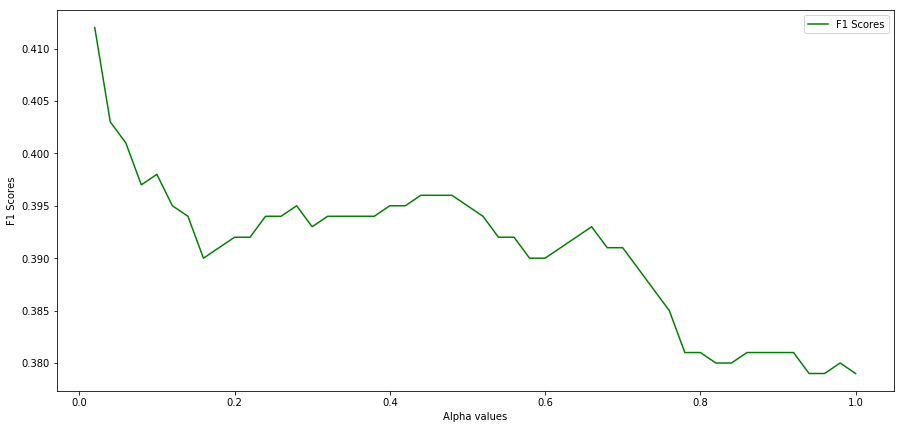

In [51]:
plt.plot(alpha_vals, yelp_bbow_bernoullinb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Alpha values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [52]:
max_index = yelp_bbow_bernoullinb_valid_f1_scores.index(max(yelp_bbow_bernoullinb_valid_f1_scores))
best_bbow_bernoullinb_alpha = alpha_vals[max_index]

In [53]:
best_bbow_bernoullinb_alpha

0.02

In [54]:
def get_bbow_bernoullinb_f1(train_vectors, train_output, best_bbow_bernoullinb_alpha, dataset_vectors, dataset_output):
    best_bbow_bernoullinb_clf = BernoulliNB(alpha=best_bbow_bernoullinb_alpha)
    best_bbow_bernoullinb_clf = best_bbow_bernoullinb_clf.fit(train_vectors, train_output)
    bbow_bernoullinb_dataset_pred = best_bbow_bernoullinb_clf.predict(dataset_vectors)
    bbow_bernoullinb_dataset_f1 = f1_score(dataset_output, bbow_bernoullinb_dataset_pred, average='micro')

    return bbow_bernoullinb_dataset_f1

In [55]:
yelp_bbow_bernoullinb_train_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_train_binary, yelp_train_output)
yelp_bbow_bernoullinb_valid_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_valid_binary, yelp_valid_output)
yelp_bbow_bernoullinb_test_f1 = get_bbow_bernoullinb_f1(yelp_vectors_train_binary, yelp_train_output, best_bbow_bernoullinb_alpha, yelp_vectors_test_binary, yelp_test_output)

In [56]:
print("Yelp Binary BoW BernoulliNB Train F1 Score:", yelp_bbow_bernoullinb_train_f1)
print("Yelp Binary BoW BernoulliNB Valid F1 Score:", yelp_bbow_bernoullinb_valid_f1)
print("Yelp Binary BoW BernoulliNB Test F1 Score:", yelp_bbow_bernoullinb_test_f1)
print("Best Binary BoW BernoulliNB Alpha Value: ", best_bbow_bernoullinb_alpha)

Yelp Binary BoW BernoulliNB Train F1 Score: 0.7301428571428571
Yelp Binary BoW BernoulliNB Valid F1 Score: 0.412
Yelp Binary BoW BernoulliNB Test F1 Score: 0.43849999999999995
Best Binary BoW BernoulliNB Alpha Value:  0.02


In [97]:
"""
Yelp Binary BoW Decision Trees
"""

'\nDecision Trees\n'

In [119]:
yelp_bbow_decisiontree_clf = DecisionTreeClassifier()
list_max_depths = [12] # [4, 6, 8, 10, 12, 14] # [20*i for i in range(1, 6)] 
list_min_samples_splits = [50] # [100, 200, 400] # [20*i for i in range(1, 6)] 
list_min_samples_leaf = [50] # [100, 200, 400] # [20*i for i in range(1, 6)] 
list_max_features = [10000] # [2000, 4000, 6000, 8000, 10000] # [2000*i for i in range(1, 6)]

tuned_parameters = [{'max_depth': list_max_depths, 'min_samples_split': list_min_samples_splits, 
                     'min_samples_leaf': list_min_samples_leaf, 'max_features': list_max_features}]
yelp_bbow_decisiontree_clf = GridSearchCV(yelp_bbow_decisiontree_clf, tuned_parameters, scoring='f1_micro', cv=3)

In [115]:
"""
Code taken from - 
https://github.com/tqdm/tqdm/issues/458
https://gist.github.com/duckythescientist/c06d87617b5d6ac1e00a622df760709d

to form a wrapper for tqdm so it is
possible to time long-running functions
"""

import time
import threading
import functools

def provide_progress_bar(function, estimated_time, tstep=1, tqdm_kwargs={}, args=[], kwargs={}):
    """Tqdm wrapper for a long-running function
    args:
        function - function to run
        estimated_time - how long you expect the function to take
        tstep - time delta (seconds) for progress bar updates
        tqdm_kwargs - kwargs to construct the progress bar
        args - args to pass to the function
        kwargs - keyword args to pass to the function
    ret:
        function(*args, **kwargs)
    """
    ret = [None]  # Mutable var so the function can store its return value
    def myrunner(function, ret, *args, **kwargs):
        ret[0] = function(*args, **kwargs)

    thread = threading.Thread(target=myrunner, args=(function, ret) + tuple(args), kwargs=kwargs)
    pbar = tqdm(total=estimated_time, **tqdm_kwargs)

    thread.start()
    while thread.is_alive():
        thread.join(timeout=tstep)
        pbar.update(tstep)
    pbar.close()
    return ret[0]

In [120]:
def fit_yelp_bbow_decisiontree(input_clf, train_vectors, train_output):
    clf = input_clf.fit(train_vectors, train_output)
    return clf

In [121]:
yelp_bbow_decisiontree_clf = provide_progress_bar(fit_yelp_bbow_decisiontree, estimated_time=900, 
                                                  args=[yelp_bbow_decisiontree_clf, yelp_vectors_train_binary, yelp_train_output])

In [123]:
yelp_binary_dt_best_params = yelp_bbow_decisiontree_clf.best_params_

In [124]:
yelp_binary_dt_best_params

{'max_depth': 12,
 'max_features': 10000,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [125]:
yelp_bbow_decisiontree_clf = DecisionTreeClassifier(max_depth=yelp_binary_dt_best_params['max_depth'],
                                                    max_features=yelp_binary_dt_best_params['max_features'], 
                                                    min_samples_leaf=yelp_binary_dt_best_params['min_samples_leaf'], 
                                                    min_samples_split=yelp_binary_dt_best_params['min_samples_split'])

In [127]:
yelp_bbow_decisiontree_clf = yelp_bbow_decisiontree_clf.fit(yelp_vectors_train_binary, yelp_train_output)

yelp_bbow_decisiontree_train_pred = yelp_bbow_decisiontree_clf.predict(yelp_vectors_train_binary)
yelp_bbow_decisiontree_valid_pred = yelp_bbow_decisiontree_clf.predict(yelp_vectors_valid_binary)
yelp_bbow_decisiontree_test_pred = yelp_bbow_decisiontree_clf.predict(yelp_vectors_test_binary)

yelp_bbow_decisiontree_train_f1 = f1_score(yelp_train_output, yelp_bbow_decisiontree_train_pred, average='micro')
yelp_bbow_decisiontree_valid_f1 = f1_score(yelp_valid_output, yelp_bbow_decisiontree_valid_pred, average='micro')
yelp_bbow_decisiontree_test_f1 = f1_score(yelp_test_output, yelp_bbow_decisiontree_test_pred, average='micro')
bbow_bernoullinb_dataset_pred

In [126]:
print("Yelp Binary BoW Decision Trees Train F1 Score:", yelp_bbow_decisiontree_train_f1)
print("Yelp Binary BoW Decision Trees Valid F1 Score:", yelp_bbow_decisiontree_valid_f1)
print("Yelp Binary BoW Decision Trees Test F1 Score:", yelp_bbow_decisiontree_test_f1)
print("Yelp Best Binary BoW Decision Trees Parameters: ", yelp_binary_dt_best_params)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [112]:
"""
Yelp Binary BoW Linear SVM
"""

In [ ]:
##### PART 3 #####

In [ ]:
### 3.a ###

In [ ]:
"""
Yelp Gaussian Naive Bayes
"""

In [ ]:
smooth_vals = []
yelp_fbow_gaussiannb_valid_f1_scores = []
for val_smooth in tqdm(smooth_vals):
    yelp_fbow_gaussiannb_clf = GaussianNB(var_smoothing=val_smooth)
    yelp_fbow_gaussiannb_clf = yelp_fbow_gaussiannb_clf.fit(yelp_vectors_train_frequency, yelp_train_output)
    yelp_fbow_gaussiannb_valid_pred = yelp_fbow_gaussiannb_clf.predict(yelp_vectors_valid_frequency)
    f1 = f1_score(yelp_valid_output, yelp_fbow_gaussiannb_valid_pred, average='micro')
    yelp_fbow_gaussiannb_valid_f1_scores.append(f1)

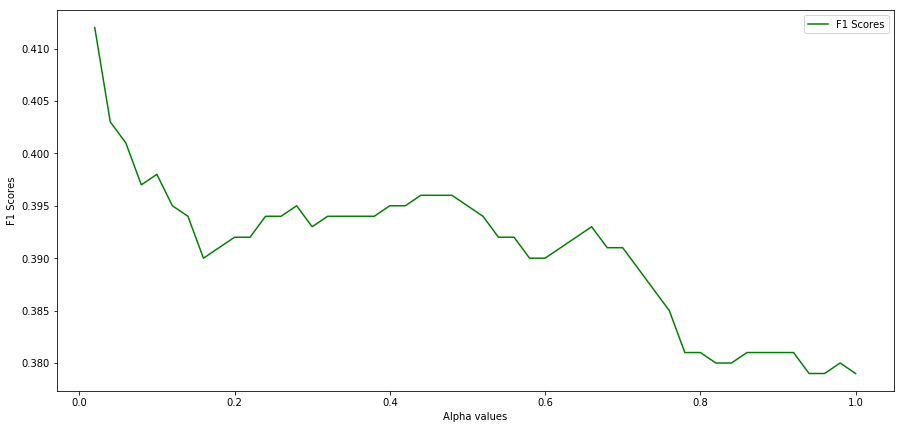

In [51]:
plt.plot(smooth_vals, yelp_fbow_gaussiannb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Smooth values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [52]:
max_index = yelp_fbow_gaussiannb_valid_f1_scores.index(max(yelp_fbow_gaussiannb_valid_f1_scores))
yelp_best_fbow_gaussiannb_smooth = smooth_vals[max_index]

In [53]:
yelp_best_fbow_gaussiannb_smooth

0.02

In [54]:
def get_fbow_gaussiannb_f1(train_vectors, train_output, best_fbow_gaussiannb_smooth, dataset_vectors, dataset_output):
    best_fbow_gaussiannb_clf = GaussianNB(var_smoothing=best_fbow_gaussiannb_smooth)
    best_fbow_gaussiannb_clf = best_fbow_gaussiannb_clf.fit(train_vectors, train_output)
    fbow_gaussiannb_dataset_pred = best_fbow_gaussiannb_clf.predict(dataset_vectors)
    fbow_gaussiannb_dataset_f1 = f1_score(dataset_output, fbow_gaussiannb_dataset_pred, average='micro')

    return fbow_gaussiannb_dataset_f1

In [55]:
yelp_fbow_gaussiannb_train_f1 = get_fbow_gaussiannb_f1(yelp_vectors_train_frequency, yelp_train_output, yelp_best_fbow_gaussiannb_smooth, yelp_vectors_train_frequency, yelp_train_output)
yelp_fbow_gaussiannb_valid_f1 = get_fbow_gaussiannb_f1(yelp_vectors_train_frequency, yelp_train_output, yelp_best_fbow_gaussiannb_smooth, yelp_vectors_valid_frequency, yelp_valid_output)
yelp_fbow_gaussiannb_test_f1 = get_fbow_gaussiannb_f1(yelp_vectors_train_frequency, yelp_train_output, yelp_best_fbow_gaussiannb_smooth, yelp_vectors_test_frequency, yelp_test_output)

In [56]:
print("Yelp Frequency BoW GaussianNB Train F1 Score:", yelp_fbow_gaussiannb_train_f1)
print("Yelp Frequency BoW GaussianNB Valid F1 Score:", yelp_fbow_gaussiannb_valid_f1)
print("Yelp Frequency BoW GaussianNB Test F1 Score:", yelp_fbow_gaussiannb_test_f1)
print("Yelp Best Frequency BoW GaussianNB Smooth Value: ", yelp_best_fbow_gaussiannb_smooth)

Yelp Binary BoW BernoulliNB Train F1 Score: 0.7301428571428571
Yelp Binary BoW BernoulliNB Valid F1 Score: 0.412
Yelp Binary BoW BernoulliNB Test F1 Score: 0.43849999999999995
Best Binary BoW BernoulliNB Alpha Value:  0.02


In [ ]:
"""
Yelp Frequency BoW Decision Trees
"""

In [ ]:
##### PART 4 #####

In [ ]:
### 4.a ###

In [37]:
"""
IMDB Random Classifier
"""

'\nYelp Random Classifier\n'

In [38]:
imdb_test_random_pred = [randint(0,1) for i in range(len(imdb_test_output))]

In [39]:
imdb_test_random_f1_score = f1_score(imdb_test_output, imdb_test_random_pred, average='micro')

In [40]:
imdb_test_random_f1_score

0.202

In [ ]:
### 4.b ###

In [47]:
"""
IMDB Bernoulli Naive Bayes
"""

'\nBernoulli Naive Bayes\n'

In [48]:
alpha_vals = [i/50 for i in range(1, 51)]
imdb_bbow_bernoullinb_valid_f1_scores = []
for val_alpha in tqdm(alpha_vals):
    imdb_bbow_bernoullinb_clf = BernoulliNB(alpha=val_alpha)
    imdb_bbow_bernoullinb_clf = imdb_bbow_bernoullinb_clf.fit(imdb_vectors_train_binary, imdb_train_output)
    imdb_bbow_bernoullinb_valid_pred = imdb_bbow_bernoullinb_clf.predict(imdb_vectors_valid_binary)
    f1 = f1_score(imdb_valid_output, imdb_bbow_bernoullinb_valid_pred, average='micro')
    imdb_bbow_bernoullinb_valid_f1_scores.append(f1)

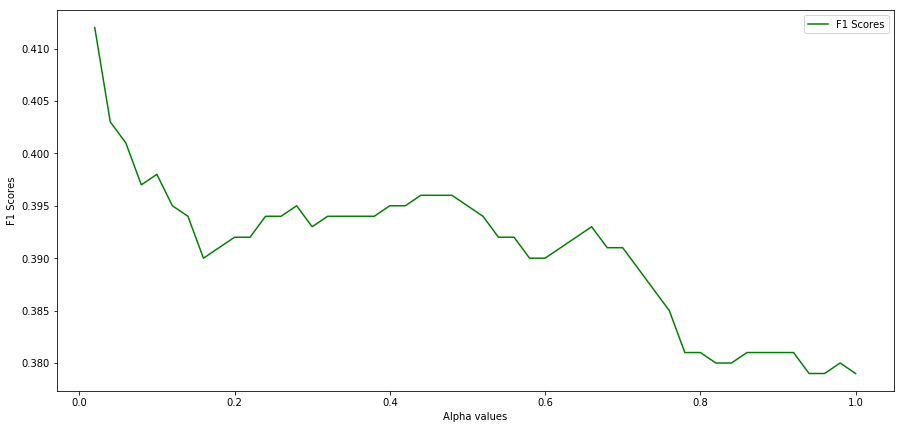

In [51]:
plt.plot(alpha_vals, imdb_bbow_bernoullinb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Alpha values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [52]:
imdb_max_index = imdb_bbow_bernoullinb_valid_f1_scores.index(max(imdb_bbow_bernoullinb_valid_f1_scores))
imdb_best_bbow_bernoullinb_alpha = alpha_vals[max_index]

In [53]:
imdb_best_bbow_bernoullinb_alpha

0.02

In [55]:
imdb_bbow_bernoullinb_train_f1 = get_bbow_bernoullinb_f1(imdb_vectors_train_binary, imdb_train_output, imdb_best_bbow_bernoullinb_alpha, imdb_vectors_train_binary, imdb_train_output)
imdb_bbow_bernoullinb_valid_f1 = get_bbow_bernoullinb_f1(imdb_vectors_train_binary, imdb_train_output, imdb_best_bbow_bernoullinb_alpha, imdb_vectors_valid_binary, imdb_valid_output)
imdb_bbow_bernoullinb_test_f1 = get_bbow_bernoullinb_f1(imdb_vectors_train_binary, imdb_train_output, imdb_best_bbow_bernoullinb_alpha, imdb_vectors_test_binary, imdb_test_output)

In [56]:
print("IMDB Binary BoW BernoulliNB Train F1 Score:", imdb_bbow_bernoullinb_train_f1)
print("IMDB Binary BoW BernoulliNB Valid F1 Score:", imdb_bbow_bernoullinb_valid_f1)
print("IMDB Binary BoW BernoulliNB Test F1 Score:", imdb_bbow_bernoullinb_test_f1)
print("IMDB Best Binary BoW BernoulliNB Alpha Value: ", imdb_best_bbow_bernoullinb_alpha)

Yelp Binary BoW BernoulliNB Train F1 Score: 0.7301428571428571
Yelp Binary BoW BernoulliNB Valid F1 Score: 0.412
Yelp Binary BoW BernoulliNB Test F1 Score: 0.43849999999999995
Best Binary BoW BernoulliNB Alpha Value:  0.02


In [ ]:
##### PART 5 #####

In [ ]:
### 5.a ###

In [ ]:
"""
IMDB Gaussian Naive Bayes
"""

In [ ]:
smooth_vals = []
imdb_fbow_gaussiannb_valid_f1_scores = []
for val_smooth in tqdm(smooth_vals):
    imdb_fbow_gaussiannb_clf = GaussianNB(var_smoothing=val_smooth)
    imdb_fbow_gaussiannb_clf = imdb_fbow_gaussiannb_clf.fit(imdb_vectors_train_frequency, imdb_train_output)
    imdb_fbow_gaussiannb_valid_pred = imdb_fbow_gaussiannb_clf.predict(imdb_vectors_valid_frequency)
    f1 = f1_score(imdb_valid_output, imdb_fbow_gaussiannb_valid_pred, average='micro')
    imdb_fbow_gaussiannb_valid_f1_scores.append(f1)

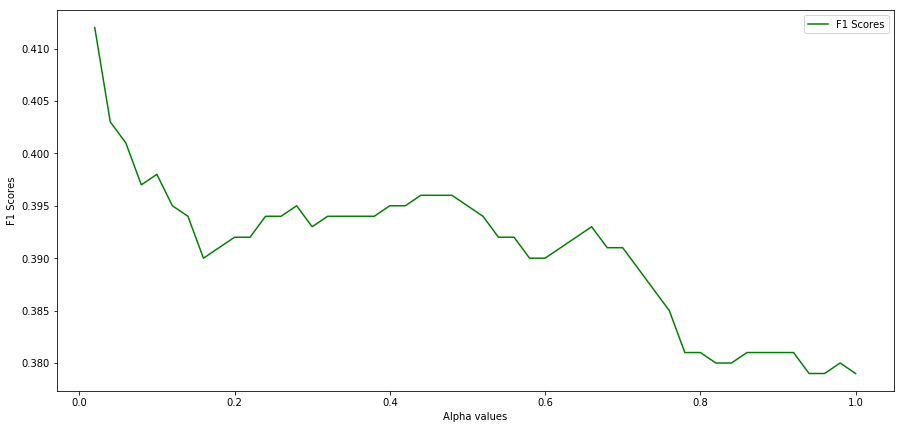

In [51]:
plt.plot(smooth_vals, imdb_fbow_gaussiannb_valid_f1_scores, 'g', label='F1 Scores')
plt.xlabel('Smooth values')
plt.ylabel('F1 Scores')
plt.legend()
plt.show()

In [52]:
max_index = imdb_fbow_gaussiannb_valid_f1_scores.index(max(imdb_fbow_gaussiannb_valid_f1_scores))
imdb_best_fbow_gaussiannb_smooth = smooth_vals[max_index]

In [53]:
imdb_best_fbow_gaussiannb_smooth

0.02

In [55]:
imdb_fbow_gaussiannb_train_f1 = get_fbow_gaussiannb_f1(imdb_vectors_train_frequency, imdb_train_output, imdb_best_fbow_gaussiannb_smooth, imdb_vectors_train_frequency, imdb_train_output)
imdb_fbow_gaussiannb_valid_f1 = get_fbow_gaussiannb_f1(imdb_vectors_train_frequency, imdb_train_output, imdb_best_fbow_gaussiannb_smooth, imdb_vectors_valid_frequency, imdb_valid_output)
imdb_fbow_gaussiannb_test_f1 = get_fbow_gaussiannb_f1(imdb_vectors_train_frequency, imdb_train_output, imdb_best_fbow_gaussiannb_smooth, imdb_vectors_test_frequency, imdb_test_output)

In [56]:
print("IMDB Frequency BoW GaussianNB Train F1 Score:", imdb_fbow_gaussiannb_train_f1)
print("IMDB Frequency BoW GaussianNB Valid F1 Score:", imdb_fbow_gaussiannb_valid_f1)
print("IMDB Frequency BoW GaussianNB Test F1 Score:", imdb_fbow_gaussiannb_test_f1)
print("IMDB Best Frequency BoW GaussianNB Smooth Value: ", imdb_best_fbow_gaussiannb_smooth)

Yelp Binary BoW BernoulliNB Train F1 Score: 0.7301428571428571
Yelp Binary BoW BernoulliNB Valid F1 Score: 0.412
Yelp Binary BoW BernoulliNB Test F1 Score: 0.43849999999999995
Best Binary BoW BernoulliNB Alpha Value:  0.02
